## Тестовое задание Часть 2. Python + Визуализация 

###### Импорт необходимых библиотек 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.impute import KNNImputer

###### Импорт датасета 

In [2]:
df = pd.read_csv('Выборка для тестового задания - 2021.csv')
# замена колонок с русским текстом на английский для удобства
df = df.rename(columns={'Дата первого занятия': 'date first lesson', 'Курс': 'course', 'М2': 'M2'})

In [3]:
# пример того, как выглядит датасет
df.sample(5)

,id,age,date first lesson,course,M2
171,10914,12.0,17.01.2021,Python Базовый,0
625,13682,14.0,21.02.2021,Python Базовый,1
503,13108,14.0,07.02.2021,Python Базовый,0
635,13714,12.0,21.02.2021,Python Базовый,1
1422,16688,NaN,28.03.2021,Веб-дизайн,0


In [4]:
# проверка датасета на пропуски и типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2172 non-null   int64  
 1   age                2022 non-null   float64
 2   date first lesson  2172 non-null   object 
 3   course             2172 non-null   object 
 4   M2                 2172 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 85.0+ KB


Как видно из данной таблички, во-первых, даты (_date first lesson_) имеют не тот формат, который требуется для работы с ними (_object_). Поэтому, для начала даты будут преобразованы в действительно даты, чтобы корректно с ними взаимодействовать в дальнейшем.

Помимо этого, также видно, что у части выборки имеются пропуски в колонке _age_, поэтому также стоит задача дополнить пропущенные значения. 

###### Перевод дат в нужный формат и замена пропусков в age 

In [5]:
# перевод дат в формат datetime
df['date first lesson'] = pd.to_datetime(df['date first lesson'], dayfirst=True)
df.sample(5)

,id,age,date first lesson,course,M2
1154,15493,13.0,2021-02-28,Python Базовый,1
416,12548,15.0,2021-02-07,Python Базовый,0
1174,15637,15.0,2021-02-28,Веб-дизайн,1
141,10661,12.0,2021-01-17,Веб-дизайн,1
278,11605,11.0,2021-01-31,Python Базовый,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2172 non-null   int64         
 1   age                2022 non-null   float64       
 2   date first lesson  2172 non-null   datetime64[ns]
 3   course             2172 non-null   object        
 4   M2                 2172 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 85.0+ KB


Даты были преобразованы, что подтверждает изменение типа у _date first lesson_ на тип _datetime64_.

Теперь можно перейти к замене пропусков в возрасте. Можно было бы просто заполнить данные пропуски общим средним возрастом из таблицы, но в данном случае будет применен способ с использованием k-ближайших соседей.

Для начала рассмотрим исходное распределение возрастов в таблице, чтобы в последующем сравнить, не изменилось ли оно после применения способа с k-ближайшими соседями. 

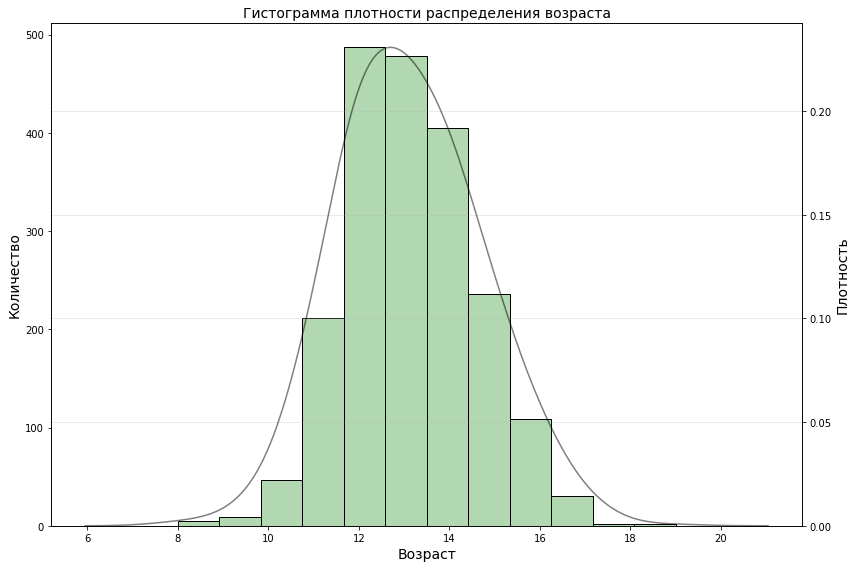

In [7]:
# построение графика, показывающего распределение возрастов в таблице и плотность данного распределения
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.histplot(df['age'], bins=12, ax=ax1, color='g', alpha=0.3)
ax2 = ax1.twinx()
sns.kdeplot(df['age'], bw_adjust=2, ax=ax2, color='black', alpha=0.5)
ax1.set_xlabel('Возраст', fontsize=14)
ax1.set_ylabel('Количество', fontsize=14)
ax2.set_ylabel('Плотность', fontsize=14)
plt.grid(alpha=0.3)
plt.title('Гистограмма плотности распределения возраста', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# применение k-ближайших соседей для замены пропусков на значения ближайших соседей
imputer = KNNImputer(n_neighbors=4)
df['age'] = imputer.fit_transform(df['age'].to_numpy().reshape((-1, 1))).astype(int)
df.sample(5)

,id,age,date first lesson,course,M2
2122,19191,12,2021-03-28,Python Базовый,0
1959,18426,14,2021-03-21,Python Базовый,0
295,11709,14,2021-01-24,Python Базовый,0
431,12682,11,2021-02-07,Python Базовый,0
112,10472,12,2021-01-17,Python Базовый,0


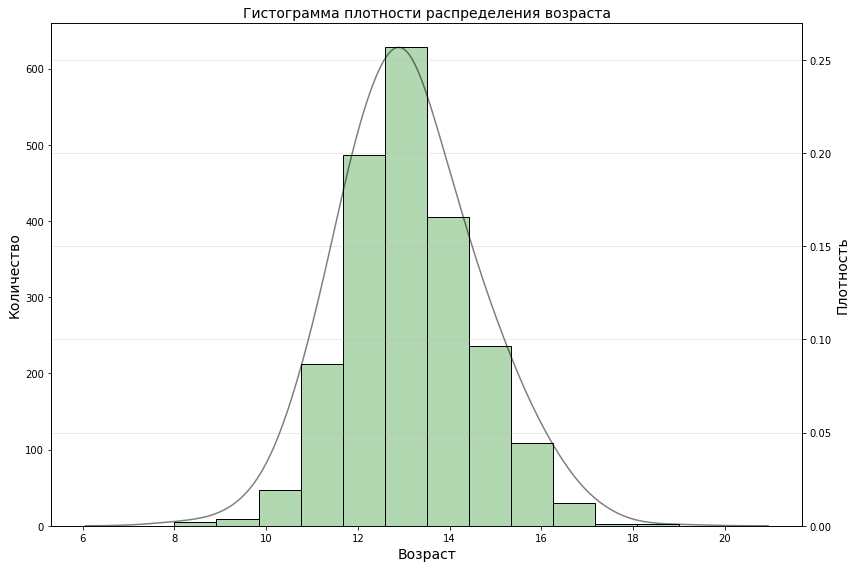

In [9]:
# построение графика, показывающего новое распределение возрастов в таблице и плотность данного нового распределения
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.histplot(df['age'], bins=12, ax=ax1, color='g', alpha=0.3)
ax2 = ax1.twinx()
sns.kdeplot(df['age'], bw_adjust=2, ax=ax2, color='black', alpha=0.5)
ax1.set_xlabel('Возраст', fontsize=14)
ax1.set_ylabel('Количество', fontsize=14)
ax2.set_ylabel('Плотность', fontsize=14)
plt.grid(alpha=0.3)
plt.title('Гистограмма плотности распределения возраста', fontsize=14)
plt.tight_layout()
plt.show()

Видно, что гистограмма незначительно изменилась - теперь в распределении больше тех, чей возраст равен 13. Не смотря на данные изменения, картина изменилась только в лучшую сторону - плотность распределения еще больше стала похожей на нормальное. 

###### Основное задание 

Задание предполагает выяснить количество студентов, ушедших после окончания первого модуля курса. В то же время известно, что один модуль длится 4 недели, то есть студенты, которые на момент отчета все еще находятся на первом модуле, так же будут иметь значение $0$ в столбце, отвечающим за отток.

Получается, что следует отобрать данных студентов как тех, кто в настоящий момент не ушел с обучения. В данном случае выбран оптимистичный вариант - эти особенные студенты будут числиться автоматически посещающими второй модуль, поэтому им будет проставлено значение $1$ (_это можно изменить по согласованию с учебным отделом, чтобы предоставить наиболее удовлятворяющий их вариант_).

In [10]:
# создание нового столбца, отвечающего за настоящий отток (если студент начал учиться позднее, чем 4 марта,
#  то данный студент все еще находится на первом модуле и не ушел)
df['true outflow'] = np.where(np.logical_and(
    df['date first lesson'] > pd.to_datetime('2021-03-04'),
    df['M2'] == 0),
                              1, df['M2']
                             )
df.head(10)

,id,age,date first lesson,course,M2,true outflow
0,2538,11,2021-02-28,Unity,0,0
1,2615,12,2021-02-14,Unity,0,0
2,2643,14,2021-02-21,Веб-дизайн,1,1
3,2968,11,2021-01-24,Python Базовый,0,0
4,3014,15,2021-03-14,Веб-дизайн,1,1
5,3121,15,2021-01-10,Unity,0,0
6,4230,12,2021-03-28,Unity,0,1
7,4848,15,2021-02-21,Веб-дизайн,1,1
8,4893,14,2021-03-28,Веб-дизайн,0,1
9,4957,14,2021-03-21,Веб-дизайн,0,1


In [11]:
# подсчет количества учеников на первом и на втором модулях
m1_students = df['course'].value_counts().to_numpy()
m2_students = df[df.M2 == 1]['course'].value_counts().to_numpy()

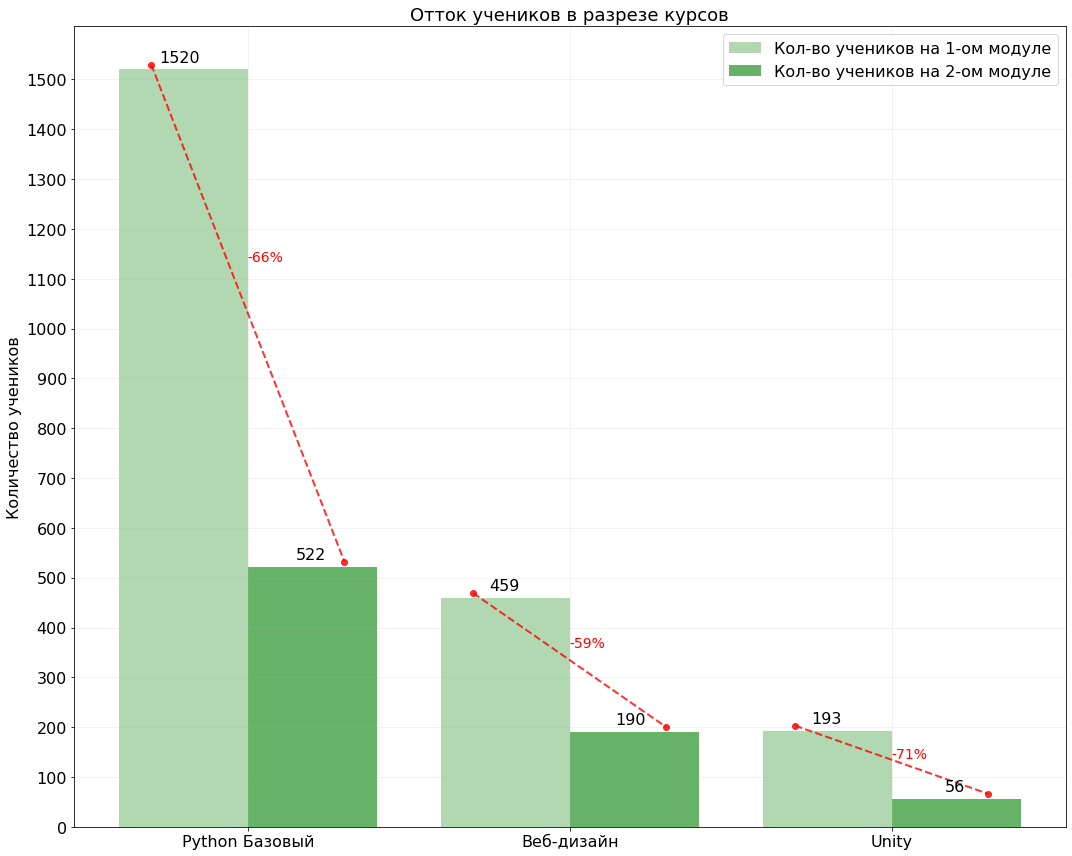

In [12]:
plt.figure(figsize=(15,12))
xlocs = np.arange(0, 4.1, 2)
xlabs = ['Python Базовый', 'Веб-дизайн', 'Unity']

# столбчатые диаграммы, показывающие количество студентов на 1-ом модуле и на 2-ом модуле
bar_1 = plt.bar(x=xlocs, height=m1_students, align='edge', width=-0.8, color='g', alpha=0.3, 
                label='Кол-во учеников на 1-ом модуле')
bar_2 = plt.bar(x=xlocs, height=m2_students, align='edge', color='g', alpha=0.6, 
                label='Кол-во учеников на 2-ом модуле')

# создание графиков линий, показывающих процент оттока с курсов
for idx, bar in enumerate(bar_1):
    w, h = bar.get_width(), bar.get_height()
    x0, y0 = bar.xy
    x3, y3 = x0 + w, y0 + h
    w, h = bar_2[idx].get_width(), bar_2[idx].get_height()
    x0, y0 = bar.xy
    x4, y4 = x0 + w, y0 + h
    x = [x3 + 0.2, x4 - 0.2]
    y = [y3 + 10, y4 + 10]
    plt.plot(x, y, lw=2, marker='o', ls='dashed', color='r', alpha=0.8)
    plt.text((x3 + x4) / 2, (y3 + y4) / 1.8, str(
        round(-1 * (m1_students[idx] - m2_students[idx]) / m1_students[idx] * 100)) + '%', fontsize=14, c='r')

# дополнительная отрисовка кол-ва учеников над столбчатыми диаграммами
xlocs_1=[0.50, 2.55, 4.55]
xlocs_2=[1.35, 3.33, 5.38]
for i, v in enumerate(df['course'].value_counts().to_numpy()):
    plt.text(xlocs_1[i] - 1.05, v + 15, str(v), fontsize=16)
for i, v in enumerate(df[df.M2 == 1]['course'].value_counts().to_numpy()):
    plt.text(xlocs_2[i] - 1.05, v + 15, str(v), fontsize=16)

# дополнительные параметры отрисовки для большего удобства и читаемости
plt.xticks(xlocs, xlabs)    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yticks(np.arange(0, 1501, 100))
plt.ylabel('Количество учеников', fontsize=16)
plt.grid(alpha=0.2)
plt.legend(fontsize=16)
plt.title('Отток учеников в разрезе курсов', fontsize=18)
plt.tight_layout()
plt.show()

Как видно из графика, для всех курсов имеется следующая особенность: доля оттока во всех случаях составляет больше $50$$\%$, то есть до второго модуля однозначно доходит меньше половины всех учащихся. 

Помимо этого, видно, что наибольший отток произошел на курсе по _Unity_, где отток составил $71$$\%$ - на курсе осталось учиться всего $56$ учеников. 

В то же время, не смотря на большой отток учеников в размере $66$$\%$, на базовом курсе по _Python_ осталось довольно-таки большое число учащихся - $522$ (для сравнения, на курсах _Unity_ и _Веб-дизайна_, где был наименьший отток, в общей сумме продолжило учиться $246$ человек).

###### Дополнительное задание 

Необходимо предоставить сведения касательно оттока учеников в разрезе возраста. Более того, имеется предположение, что дети младше $12$ и старше $14$ лет чаще переходят в отток. Следует рассмотреть подробнее, является ли это таковым на самом деле.

Как и в прошлом задании, предполагается оптимистичный вариант перехода в отток: ученики, которые недавно оказались на первом модуле и еще не прошли $4$-недельное обучение, считаются автоматически присутствующими на втором модуле.

In [13]:
# составление списка возрастов учеников и последующая группировка по возрасту для подсчета учеников в группах
ages = df['age'].value_counts().reset_index()['index'].sort_values().to_numpy()
grouped_ages_total = df.groupby('age')['M2'].count().reset_index()['M2']
grouped_ages_m2 = df.groupby('age')['true outflow'].sum().reset_index()['true outflow']

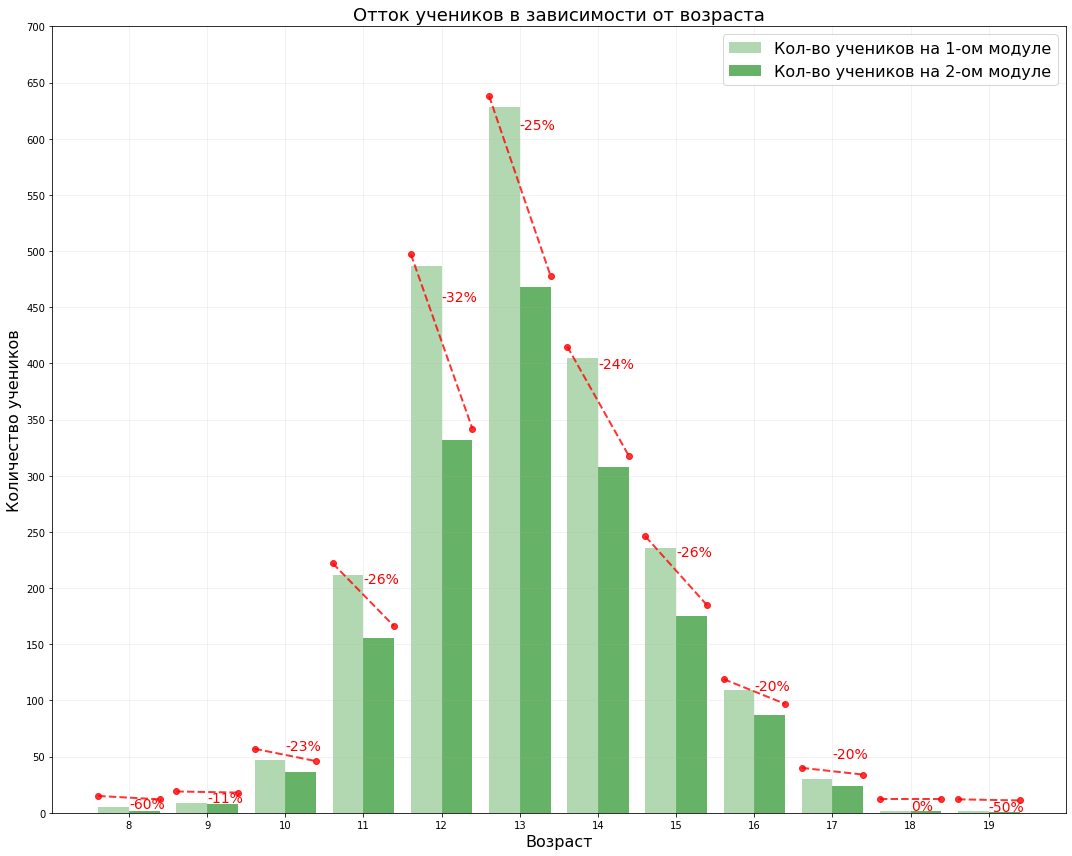

In [14]:
# построение столбчатых диаграмм, показывающих в разрезе возраста общее кол-во учеников 
# и кол-во учеников, оставшихся на 2-ом модуле
xlocs = np.linspace(0, 12 + 2, len(ages))
xlabs = ages
plt.figure(figsize=(15,12))
bar_1 = plt.bar(x=xlocs, height=grouped_ages_total, align='edge', width=-0.5, color='g', alpha=0.3, 
                label='Кол-во учеников на 1-ом модуле')
bar_2 = plt.bar(x=xlocs, height=grouped_ages_m2, align='edge', width=0.5, color='g', alpha=0.6, 
                label='Кол-во учеников на 2-ом модуле')

# построение графиков линий, показывающих процент оттока в каждом возрасте
for idx, bar in enumerate(bar_1):
    w, h = bar.get_width(), bar.get_height()
    x0, y0 = bar.xy
    x3, y3 = x0 + w, y0 + h
    w, h = bar_2[idx].get_width(), bar_2[idx].get_height()
    x0, y0 = bar.xy
    x4, y4 = x0 + w, y0 + h
    x = [x3, x4]
    y = [y3 + 10, y4 + 10]
    plt.plot(x, y, lw=2, marker='o', ls='dashed', color='r', alpha=0.8)
    if 35 < y4 < 48:
        plt.text((x3 + x4) / 2, (y3 + y4) / 1.5, str(round(
            (-1 * (grouped_ages_total[idx] - grouped_ages_m2[idx]) / grouped_ages_total[idx] * 100))) + '%', fontsize=14, c='r')
    elif 20 <= y4 < 35:
        plt.text((x3 + x4) / 2, y3 + y4 - 5, str(round(
            (-1 * (grouped_ages_total[idx] - grouped_ages_m2[idx]) / grouped_ages_total[idx] * 100))) + '%', fontsize=14, c='r')
    else:
        plt.text((x3 + x4) / 2, (y3 + y4) / 1.8, str(round(
            (-1 * (grouped_ages_total[idx] - grouped_ages_m2[idx]) / grouped_ages_total[idx] * 100))) + '%', fontsize=14, c='r')

# дополнительные параметры отрисовки для большего удобства и читаемости
plt.xticks(xlocs, xlabs)
plt.yticks(np.arange(0, 701, 50))
plt.grid(alpha=0.2)
plt.legend(fontsize=16)
plt.xlabel('Возраст', fontsize=16)
plt.ylabel('Количество учеников', fontsize=16)
plt.title('Отток учеников в зависимости от возраста', fontsize=18)
plt.tight_layout()
plt.show()

Из графика можно отметить то, что процент оттока среди учеников в возрасте до $12$ и старше $14$ в целом незначительно отличается от процента оттока учеников в возрасте $12$-$14$ лет, если не учитывать своего рода выбросы в виде $8$ и $19$ лет, где процент оттока составляет $60$$\%$ и $50$$\%$ соответственно. 

Таким образом, гипотеза о том, что ученики младше $12$ и старше $14$ чаще переходят в отток, не подтвердилась.